In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
java_dataset = pd.read_csv('/content/drive/MyDrive/machine learning/merged dataset_FE_LM_GC_DC_class balancer.csv',
                    sep=',', encoding='iso-8859-1')

In [5]:
csharp_dataset = pd.read_csv('/content/drive/MyDrive/machine learning/DatasetCSharp.csv',
                    sep=';', encoding='iso-8859-1')

## **PREDICTOR AND TARGET ATTRIBUTES**

In [15]:
#Java Dataset
x_train_binary = java_dataset.iloc[:, [10,11,13,14,15,17,19,21,22,23,25,30,31,33,34,35,37,40,44,54,60,61,62,63,64]].values
x_train_multiclass = java_dataset.iloc[:, [10,11,13,14,15,17,19,21,22,23,25,30,31,33,34,35,37,40,44,54,60,61,62,63,64]].values
y_train_binary = java_dataset.iloc[:, 5].values
y_train_multiclass = java_dataset.iloc[:, 7].values

#CSharp Dataset
x_test_binary = csharp_dataset.iloc[:, [8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,26,28,30,34,36,37,38,39,40]].values
x_test_multiclass = csharp_dataset.iloc[:, [8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,26,28,30,34,36,37,38,39,40]].values
y_test_binary = csharp_dataset.iloc[:, 5].values
y_test_multiclass = csharp_dataset.iloc[:, 7].values

In [16]:
import warnings
warnings.filterwarnings("ignore")

# **Binary Code Smell Detection**

In [8]:
pip install seaborn

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.17      0.29         6

    accuracy                           0.89        46
   macro avg       0.94      0.58      0.61        46
weighted avg       0.90      0.89      0.86        46



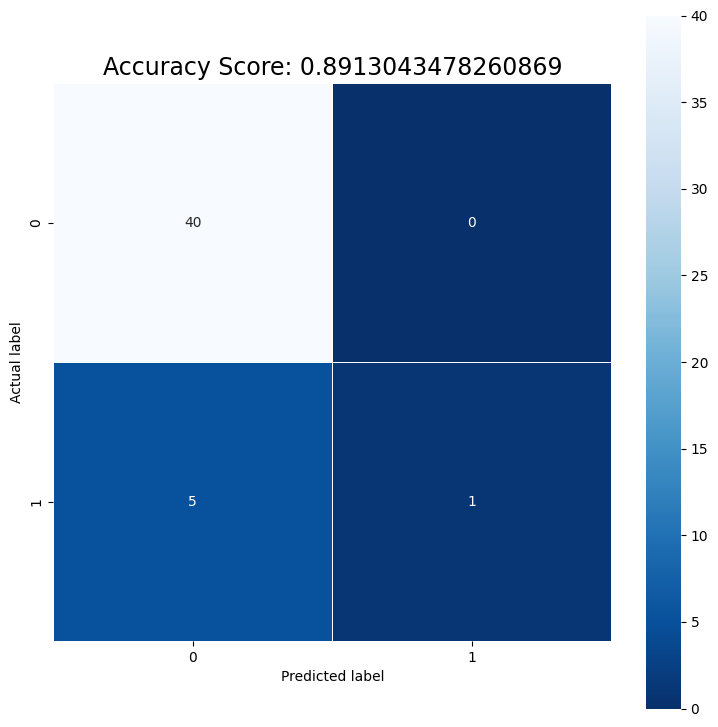

In [17]:
#predictors_array = predictors_chi_original
r = 42

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(predictors_array, binary_target, test_size = 0.3, random_state = r)
#x_train_multiclass, x_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(predictors_array, multiclass_target, test_size = 0.3, random_state = r)

# Define the detector model
detector = RandomForestClassifier(random_state=42, n_estimators=524, min_samples_split=12, min_samples_leaf=4, max_features='sqrt', max_depth=13,
                                  criterion='entropy', bootstrap=False)

detector.fit(x_train_binary, y_train_binary)
predictions_detector = detector.predict(x_test_binary)


cm = confusion_matrix(y_test_binary, predictions_detector)

print(classification_report(y_test_binary, predictions_detector))

score = detector.score(x_test_binary, y_test_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **Exclude instances of no-smell from the training and test sets**


In [10]:
finish = False
while (finish == False):
  try:
    max = x_train_multiclass.shape[0]
    # Exclude instances of no-smell from the training set (targets)
    for i in range(0, max):
      if (y_train_multiclass[i] == 0):
        y_train_multiclass = np.delete(y_train_multiclass, i, axis = 0)
        x_train_multiclass = np.delete(x_train_multiclass, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the y_train set!")
  except:
    finish == False


finish = False
while (finish == False):
  try:
    max = x_test_multiclass.shape[0]
    # Exclude instances of no-smell from the test set (predictors)
    for i in range(0, max):
      if (y_test_multiclass[i] == 0):
        y_test_multiclass = np.delete(y_test_multiclass, i, axis = 0)
        x_test_multiclass = np.delete(x_test_multiclass, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the x_train set!")
  except:
    finish = False

The deletion is over in the y_train set!
The deletion is over in the x_train set!


# Prepare training and test set for applying XGBoost

In [11]:
for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 1.0:
      y_train_multiclass[j]= 0.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 1.0:
      y_test_multiclass[j]= 0.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 2.0:
      y_train_multiclass[j]= 1.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 2.0:
      y_test_multiclass[j]= 1.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 3.0:
      y_train_multiclass[j]= 2.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 3.0:
      y_test_multiclass[j]= 2.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 4.0:
      y_train_multiclass[j]= 3.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 4.0:
      y_test_multiclass[j]= 3.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 5.0:
      y_train_multiclass[j]= 4.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 5.0:
      y_test_multiclass[j]= 4.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 6.0:
      y_train_multiclass[j]= 5.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 6.0:
      y_test_multiclass[j]= 5.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 7.0:
      y_train_multiclass[j]= 6.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 7.0:
      y_test_multiclass[j]= 6.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 8.0:
      y_train_multiclass[j]= 7.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 8.0:
      y_test_multiclass[j]= 7.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 9.0:
      y_train_multiclass[j]= 8.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 9.0:
      y_test_multiclass[j]= 8.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 10.0:
      y_train_multiclass[j]= 9.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 10.0:
      y_test_multiclass[j]= 9.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 11.0:
      y_train_multiclass[j]= 10.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 11.0:
      y_test_multiclass[j]= 10.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 12.0:
      y_train_multiclass[j]= 11.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 12.0:
      y_test_multiclass[j]= 11.0

# **Code Smell Severity Classification with three ensemble method**


# **RANDOM FOREST**

In [ ]:
# **Oversampling BorderlineSMOTE**

In [12]:
pip install imbalanced-learn

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

# **Randomized**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

KeyboardInterrupt: 

In [ ]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

y_pred_test = best_estimator.predict(x_test_multiclass)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BayesSearch**

In [ ]:
pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/rosario/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'gini', 20, 'sqrt', 1, 2, 1000] before, using random point [False, 'log_loss', 4, 'log2', 19, 18, 872]
  warnings.warn(
/home/rosario/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'gini', 20, 'sqrt', 1, 2, 1000] before, using random point [False, 'gini', 11, 'log2', 19, 5, 794]
  warnings.warn(
/home/rosario/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'gini', 20, 'sqrt', 1, 2, 1000] before, using random point [False, 'entropy', 8, 'sqrt', 12, 14, 241]
  warnings.warn(
/home/rosario/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'log_loss', 20, 'sqrt', 1, 2, 1000] before, using random poin

OrderedDict([('bootstrap', True), ('criterion', 'log_loss'), ('max_depth', 10), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)]);99.67;78.95
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         3
         1.0       0.70      0.88      0.78         8
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         2
         4.0       0.83      0.83      0.83        24
         5.0       0.78      0.88      0.82         8
         6.0       0.43      0.43      0.43         7
         7.0       0.79      0.83      0.81        18
         8.0       1.00      0.83      0.91         6
         9.0       1.00      0.50      0.67         2
        10.0       0.80      0.80      0.80        10
        11.0       0.92      0.96      0.94        24

    accuracy                           0.79       114
   macro avg       0.63      0.61      0.61       

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


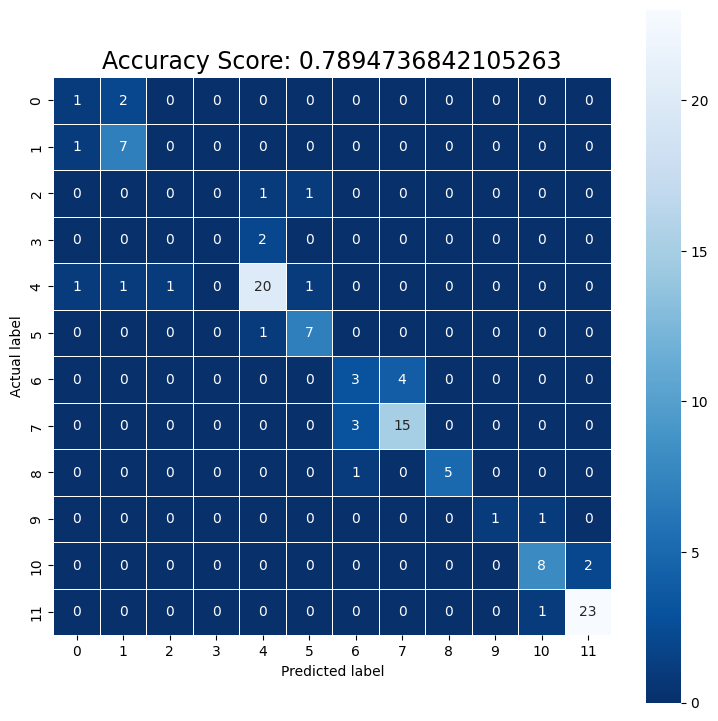

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': Integer(50, 1000),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
bayes_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = bayes_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = bayes_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **EXTREME GRADIENTE BOOSTING (XGBOOST)**

# **Randomized**

{'tree_method': 'approx', 'objective': 'multi:softmax', 'n_estimators': 420, 'max_depth': 5, 'learning_rate': 0.5, 'grow_policy': 'lossguide', 'booster': 'gbtree'};99.67;78.07
              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         3
         1.0       0.70      0.88      0.78         8
         2.0       0.00      0.00      0.00         2
         3.0       1.00      0.50      0.67         2
         4.0       0.84      0.88      0.86        24
         5.0       0.75      0.75      0.75         8
         6.0       0.50      0.43      0.46         7
         7.0       0.72      0.72      0.72        18
         8.0       0.57      0.67      0.62         6
         9.0       1.00      0.50      0.67         2
        10.0       0.89      0.80      0.84        10
        11.0       0.92      1.00      0.96        24

    accuracy                           0.78       114
   macro avg       0.70      0.62      0.64       114
weighted avg

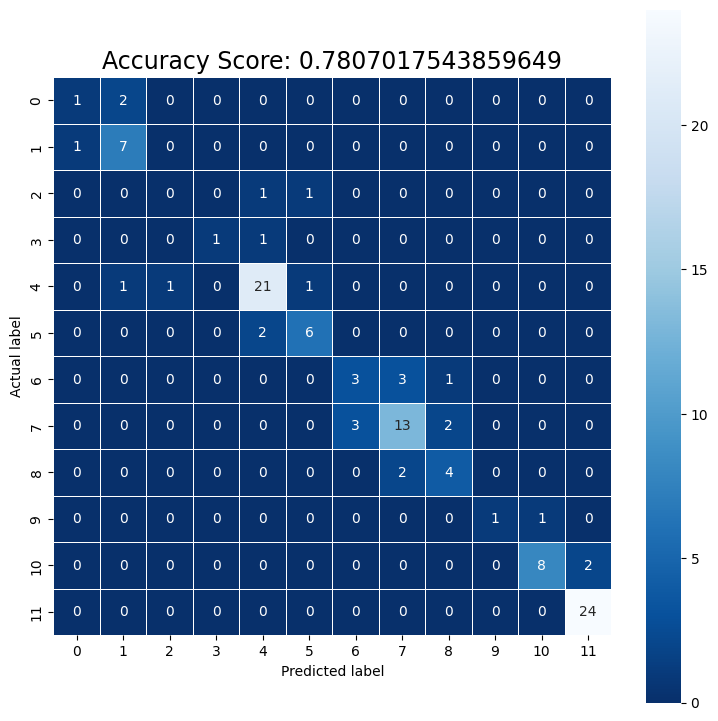

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

In [ ]:
# **BorderlineSMOTE**

{'tree_method': 'hist', 'objective': 'multi:softmax', 'n_estimators': 406, 'max_depth': 3, 'learning_rate': 0.3310344827586207, 'grow_policy': 'lossguide', 'booster': 'gbtree'};99.83;72.81
              precision    recall  f1-score   support

         0.0       0.25      0.33      0.29         3
         1.0       0.64      0.88      0.74         8
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         2
         4.0       0.78      0.75      0.77        24
         5.0       0.86      0.75      0.80         8
         6.0       0.50      0.43      0.46         7
         7.0       0.70      0.78      0.74        18
         8.0       0.60      0.50      0.55         6
         9.0       1.00      0.50      0.67         2
        10.0       0.73      0.80      0.76        10
        11.0       0.92      0.92      0.92        24

    accuracy                           0.73       114
   macro avg       0.58      0.55      0.56       114

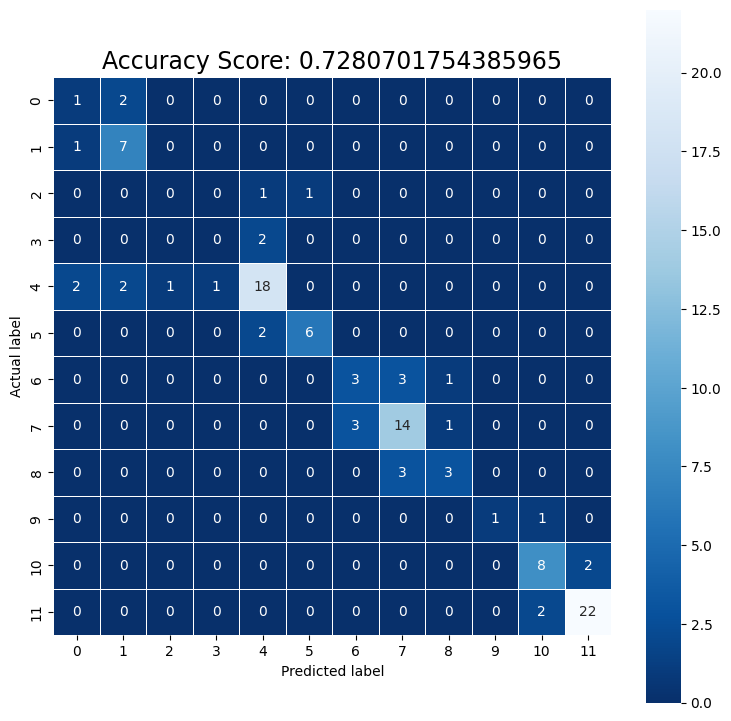

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)


print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BayesSearch**

In [ ]:
pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


OrderedDict([('booster', 'gbtree'), ('grow_policy', 'lossguide'), ('learning_rate', 0.3990028108404369), ('max_depth', 5), ('n_estimators', 593), ('objective', 'multi:softmax'), ('tree_method', 'approx')]);99.67;75.44
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         3
         1.0       0.50      0.75      0.60         8
         2.0       0.00      0.00      0.00         2
         3.0       1.00      0.50      0.67         2
         4.0       0.83      0.83      0.83        24
         5.0       1.00      0.62      0.77         8
         6.0       0.50      0.43      0.46         7
         7.0       0.70      0.78      0.74        18
         8.0       0.67      0.67      0.67         6
         9.0       1.00      0.50      0.67         2
        10.0       0.80      0.80      0.80        10
        11.0       0.92      0.96      0.94        24

    accuracy                           0.75       114
   macro avg       0.69 

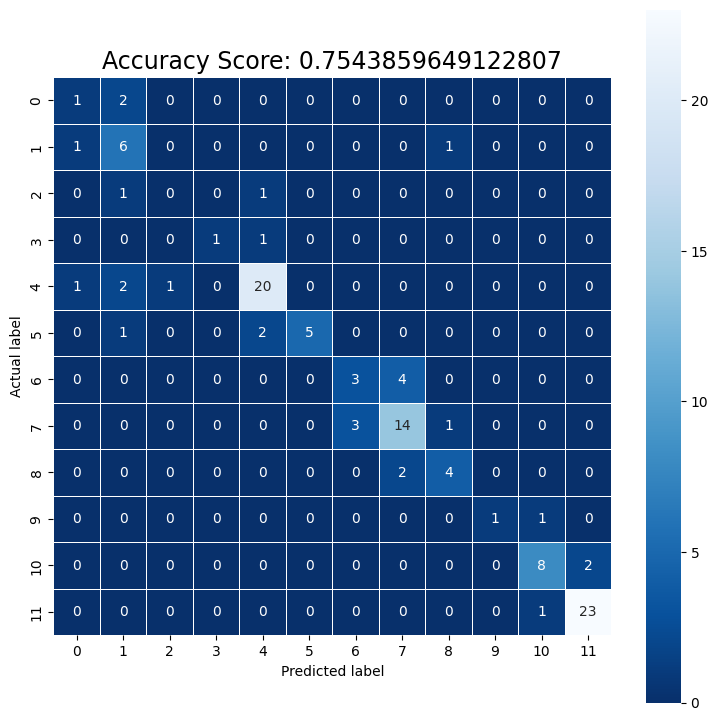

In [ ]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 20),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : Real(0.01, 0.5)
}

# Configure RandomizedSearchCV
bayes_search = BayesSearchCV(estimator=xg, search_spaces=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
bayes_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = bayes_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = bayes_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **CATEGORICAL BOOSTING (CATBOOST)**

In [ ]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# **Randomized**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the CatBoost model
cat = CatBoostClassifier(task_type='CPU', thread_count=-1, random_state = 42, verbose=False, classes_count=12)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['MultiClass', 'MultiClassOneVsAll'],
    'iterations': np.arange(50, 1000, 2),
    'depth': np.arange(1, 16, 1),
    'learning_rate': np.linspace(0.01, 0.5, 30),
    'l2_leaf_reg': np.arange(1, 10, 1),
    'border_count': np.arange(32, 256, 16),
    'feature_border_type' : ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy'],
    'leaf_estimation_method' : ['Newton', 'Gradient'],
    'auto_class_weights' : ['Balanced', 'SqrtBalanced'],
    'grow_policy' : ['SymmetricTree', 'Lossguide', 'Depthwise'],
    'bootstrap_type' : ['Bayesian', 'Bernoulli', 'MVS', 'No']
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=cat, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

# **BayesSearch**

# **STACKING**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, SMOTEN, SVMSMOTE, ADASYN

class StackingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kf = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))

        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kf.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict_proba(X[holdout_index])[:, 1]
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.mean([model.predict_proba(X)[:, 1] for model in base_models], axis=0)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

    def predict_proba(self, X):
        meta_features = np.column_stack([
            np.mean([model.predict_proba(X)[:, 1] for model in base_models], axis=0)
            for base_models in self.base_models_])
        return self.meta_model_.predict_proba(meta_features)


# Dividir o conjunto de dados em treino e teste
#X_train, X_test, y_train, y_test = train_test_split(predictors_chi_original, target, test_size=0.3, random_state=42)


# Definir os modelos base
base_models = [RandomForestClassifier(random_state=42, n_estimators=970, min_samples_split=7, min_samples_leaf=3, max_features=None, max_depth=6,
                                      criterion='log_loss', bootstrap=True),
               XGBClassifier(random_state=42, tree_method='approx', objective='multi:softmax', n_estimators=420, max_depth=5, learning_rate=0.5,
                             grow_policy='lossguide', booster='gbtree'),
               CatBoostClassifier(task_type='CPU', thread_count=-1, random_state = 42, verbose=False),
              ]


best_meta_model = XGBClassifier(random_state=42, tree_method='approx', objective='multi:softmax', n_estimators=420, max_depth=5, learning_rate=0.5,
                             grow_policy='lossguide', booster='gbtree')

# Criar o modelo de empilhamento com o melhor meta-modelo
stacking_clf = StackingClassifier(base_models=base_models, meta_model=best_meta_model)

# Treinar o modelo de empilhamento
stacking_clf.fit(x_train_multiclass, y_train_multiclass)

# Avaliar o modelo
train_preds = stacking_clf.predict(x_train_multiclass)
test_preds = stacking_clf.predict(x_test_multiclass)

print(classification_report(y_train_multiclass, train_preds))

print(classification_report(y_test_multiclass, test_preds))




              precision    recall  f1-score   support

         0.0       0.33      0.10      0.15        10
         1.0       0.91      0.68      0.78        31
         2.0       0.20      0.22      0.21         9
         3.0       0.00      0.00      0.00         6
         4.0       0.40      0.47      0.43        43
         5.0       0.30      0.42      0.35        26
         6.0       0.24      0.40      0.30        25
         7.0       0.27      0.31      0.29        39
         8.0       0.34      0.32      0.33        31
         9.0       0.00      0.00      0.00         7
        10.0       0.42      0.43      0.43        23
        11.0       0.51      0.37      0.43        49

    accuracy                           0.38       299
   macro avg       0.33      0.31      0.31       299
weighted avg       0.40      0.38      0.38       299

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.60 